In [82]:
                    #### Importing libraries ####
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import vgg19
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import imutils
import pickle
from tqdm.auto import tqdm
from scipy import spatial
import vptree


In [74]:
####################.   Image Retrival ######################
!pip install vptree

In [83]:
#### Defining distance measures


def cosine_similarity(vec1, vec2):
    return spatial.distance.cosine(vec1, vec2)
def euclidean(vec1,vec2):
    return spatial.distance.euclidean(vec1,vec2)

In [84]:
ls

Archive.zip                  image_hashes.txt
Data/                        miniData/
encoding.csv                 miniData.zip
encoding.ipynb               neural_style_transfer.ipynb
encoding_dict.txt            path_hashes.txt
encoding_function.ipynb      save_test
extraction.ipynb             vp_tree.ipynb
fff.txt                      vp_tree.txt


In [85]:
with open('encoding_dict.txt', 'rb') as handle:
    encoding_dict = pickle.load(handle)
#### Opening the previously saved file with image encodings###

In [86]:
dict_keys = encoding_dict.keys()
dict_keys

dict_keys(['image_array', 'image_path', 'folder_path', 'encoding'])

In [100]:
path_hashes = {}
for (i,im_path) in tqdm(enumerate(encoding_dict['image_path'])):
    h = encoding_dict['encoding'][i]
    ki = im_path
    path_hashes[str(h)] = ki
##### Creating a dictionary with keys as str(encoding) and value as 'image_path' #####

In [101]:
with open('path_hashes.txt', 'wb') as f:
    pickle.dump(path_hashes, f)
    f.close()

In [89]:
points = list(encoding_dict['encoding'])
#### List of embedding vectors to create a vantage_point tree

In [90]:
### Creating VP-Tree for nearest neighbor search###
#### https://en.wikipedia.org/wiki/Vantage-point_tree ####
#### implementation ###### https://github.com/RickardSjogren/vptree###
tree = vptree.VPTree(points, euclidean)
with open('vp_tree.txt', 'wb') as f:
    pickle.dump(tree, f)
    f.close()

In [99]:
ls

Archive.zip                  image_hashes.txt
Data/                        miniData/
encoding.csv                 miniData.zip
encoding.ipynb               neural_style_transfer.ipynb
encoding_dict.txt            path_hashes.txt
encoding_function.ipynb      save_test
extraction.ipynb             vp_tree.ipynb
fff.txt                      vp_tree.txt


In [96]:
with open('vp_tree.txt', 'rb') as handle:
    vp_tree = pickle.load(handle)

In [97]:
query = list(encoding_dict['encoding'][10])
results = vp_tree.get_n_nearest_neighbors(query, 10)

In [98]:
results

[(0.0, array([17140,     0,     0, ...,     0,     0,     0])),
 (842013.0411775105, array([18548,     0,   338, ...,     0,     0,     0])),
 (861974.8825824335, array([35047,    13,     0, ...,     0,     0,     0])),
 (878095.9614654881, array([6653,    0,  280, ...,    0,    0,    0])),
 (903464.0088121939, array([642,   4,   0, ...,   0,   0,   0])),
 (909477.9267717276, array([10369,  7466,  1004, ...,     0,     0,     0])),
 (916519.6262803104, array([12770,   276,  3003, ...,     0,     0,     0])),
 (919527.3227468557, array([28, 72,  0, ...,  0,  0,  0])),
 (923042.5121818604, array([1703,    0,  170, ...,    0,    0,    0])),
 (926342.8769413624, array([5462,  408, 1524, ...,    0,    0,    0]))]

(<matplotlib.image.AxesImage at 0x7fdfde503f98>,
 './miniData/Cubism/albert-gleizes_football-players-1912.jpg')

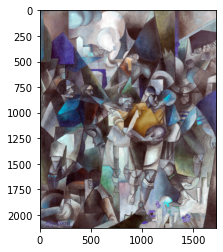

In [93]:
plt.imshow(cv2.imread(hashes[str(results[0][1])])),hashes[str(results[0][1])]

(<matplotlib.image.AxesImage at 0x7fe1834bcd30>,
 './miniData/Cubism/albert-gleizes_la-chasse-1911.jpg')

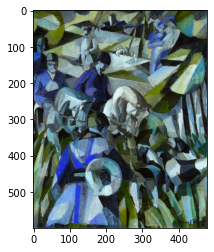

In [94]:
plt.imshow(cv2.imread(hashes[str(results[5][1])])),hashes[str(results[5][1])]